<a href="https://colab.research.google.com/github/tiagosardi/optimizationMethod/blob/main/descidaGradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

resolvendo problemas de otimização com restrições de várias variáveis

Algoritmo:
1. Gerar uma solucao inicial x[]
2. Definir uma direção de busca s
3. Dar um passo de tamanho alfa na direção s: x = x+ alfa*s
4. se não entrar no critério de parada, ir para 2

Métodos indiretos:
  São métodos que não usam valor de f(x) diretamente. Descida do Gradiente é um método Indireto e vamos implementá-lo


x[] = vetor com varias variáveis de restrições
alfa = arg min f( x[] - alfa gradienteF )


In [1]:
!git clone https://github.com/tiagosardi/optimizationMethod.git


fatal: destination path 'optimizationMethod' already exists and is not an empty directory.


In [2]:
import sys
sys.path.append('/content/optimizationMethod/')
import aproximacaoQuadratica as aq
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def gradiente_descendente(x,f,gradiente,tol=1e-6, alfa=[], line_search=aq.quadratic_fit_search):
  
  lx=[x]
  lfx=[f(x)]
  
  gradx = gradiente(x) #calcula o gradiente
  while np.linalg.norm(gradx) > tol: #enquanto a norma do gradiente for maior q a tolerancia

    if not alfa: #se po alfa nao for fixo, vamos buscar com a aproximacao quadratica
      f_aux = lambda a: f(x- a*gradx)
      bracket = ls.bracket(0, f_aux) #encontrar um intervalo em q a funcao eh unimodal (alfa=0)
      alfa = line_search(f, bracket[0], bracket[1], tol=tol)
    
    x=x-alfa*gradiente(x) #direcao do vetor
    gradx = gradiente(x) #atualiza o gradiente
    lx.append(x)
    lfx.append(f(x))

  return x,lx,lfx

In [4]:
f= lambda x: x[0]**2 + x[1]**2 + x[0]*x[1] #funcao amostrada
gradiente = lambda x: np.array([2*x[0] * 2*x[1], 2*x[1]+x[0]]) #posicoes extraidas do calculo do gradiente da funcao
H = lambda x: np.array([2,1],
                       [1,2]) #calculo da hersiana extraida da funcao
f([2,-1])
gradiente([2,-1])


array([-8,  0])

In [5]:
delta = .025
x = np.arange(-3.0, 3.0 , delta)
y = np.arange(-2,2,delta)
X,Y = np.meshgrid(x,y)
Z = np.ndarray((len(X), len(X[0])))

for i in range(len(X)):
  for j in range(len(X[0])):
    Z[i][j] = f([X[i][j] , Y[i][j]])


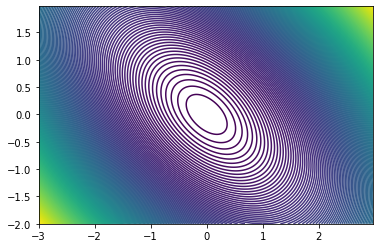

In [6]:
fig, ax = plt.subplots()
CS = ax.contour(X,Y,Z,200)

In [7]:
x,lx,lfx = gradiente_descendente(np.array([-2,1]), f, gradiente, tol=1e-6, alfa=.1)
print(x)

[-0.00066842  0.00033443]


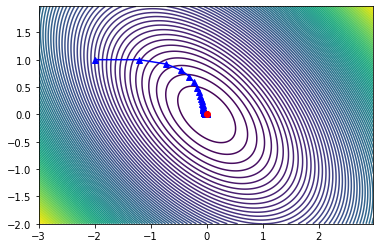

In [8]:
x0 = [x[0] for x in  lx]
x1 = [x[1] for x in  lx]

fig, ax = plt.subplots()
ax.contour(X,Y,Z,100)
ax.plot(x0,x1,'^b-')
ax.plot(x[0], x[1], 'or')